#assignment eda1



In [3]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the datasets
df=pd.read_csv('/content/Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [5]:
df.shape

(2126, 14)

In [6]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [7]:
#check missing value
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [8]:
#summary
summary=df.describe()
print(summary)

                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

<Axes: >

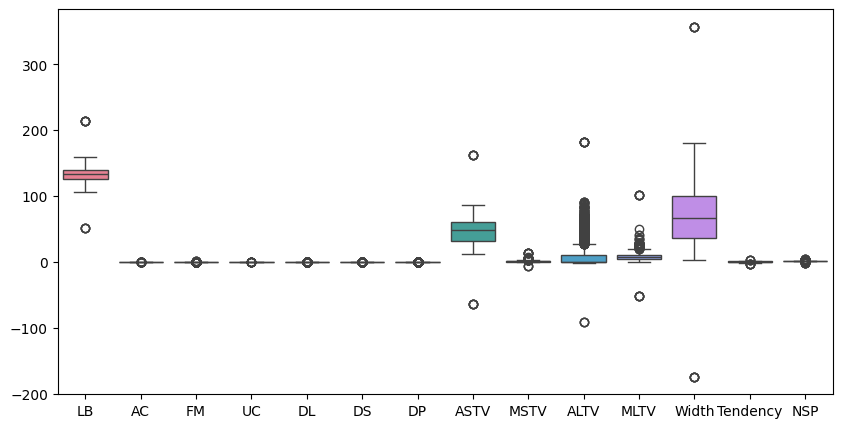

In [9]:
#check outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

In [10]:
df.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [11]:
#handle missing value
df.fillna(df.median(), inplace=True)



In [12]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [13]:
#treat outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df)


              LB        AC       FM        UC        DL   DS   DP  ASTV  MSTV  \
1     132.000000  0.006380  0.00000  0.006380  0.003190  0.0  0.0  17.0   2.1   
2     133.000000  0.003322  0.00000  0.008306  0.003322  0.0  0.0  16.0   2.1   
4     131.948232  0.006515  0.00000  0.008143  0.000000  0.0  0.0  16.0   2.4   
37    114.000000  0.004559  0.00000  0.004559  0.003040  0.0  0.0  24.0   3.2   
50    133.000000  0.001634  0.00000  0.008086  0.000000  0.0  0.0  29.0   1.3   
...          ...       ...      ...       ...       ...  ...  ...   ...   ...   
2113  136.000000  0.000000  0.00207  0.008282  0.000000  0.0  0.0  67.0   1.5   
2117  140.000000  0.000000  0.00000  0.007812  0.000000  0.0  0.0  79.0   0.3   
2118  140.000000  0.000000  0.00000  0.006470  0.000898  0.0  0.0  79.0   0.5   
2119  140.000000  0.000000  0.00000  0.006764  0.001127  0.0  0.0  79.0   0.6   
2120  140.000000  0.000000  0.00000  0.004975  0.001244  0.0  0.0  77.0   0.7   

           ALTV  MLTV  Widt

<Axes: >

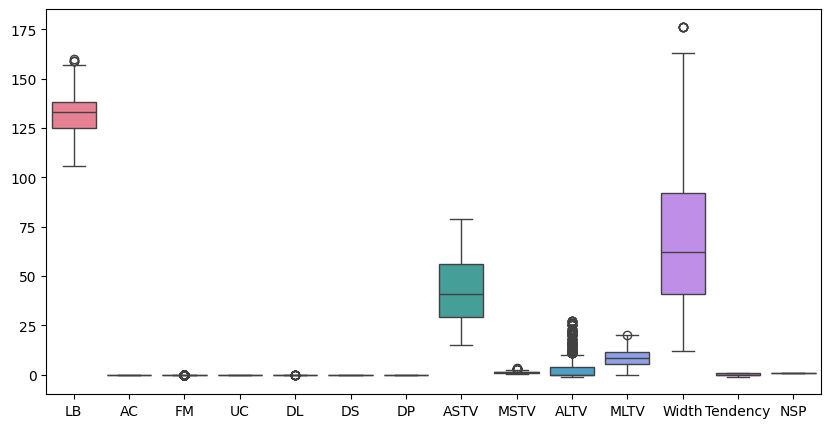

In [14]:
#confirm after treating
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

In [15]:
#find important insight
median=df.median()
print(median)

LB          133.000000
AC            0.003311
FM            0.000000
UC            0.005039
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         41.000000
MSTV          1.200000
ALTV          0.000000
MLTV          8.400000
Width        62.000000
Tendency      0.000000
NSP           1.000000
dtype: float64


In [16]:
mean=df.mean()
print(mean)

LB          131.859413
AC            0.004036
FM            0.000606
UC            0.004961
DL            0.001547
DS            0.000000
DP            0.000000
ASTV         42.465669
MSTV          1.273759
ALTV          3.153095
MLTV          8.596245
Width        67.784187
Tendency      0.333758
NSP           1.000000
dtype: float64


In [17]:
std=df.std()
print(std)

LB           9.393070
AC           0.003710
FM           0.001346
UC           0.002707
DL           0.002214
DS           0.000000
DP           0.000000
ASTV        15.055465
MSTV         0.541923
ALTV         6.032308
MLTV         4.457159
Width       32.370319
Tendency     0.585941
NSP          0.000000
dtype: float64


In [18]:
iqr_values = df.quantile(0.75) - df.quantile(0.25)
print(iqr_values)

LB          13.000000
AC           0.006666
FM           0.000323
UC           0.003783
DL           0.003083
DS           0.000000
DP           0.000000
ASTV        27.000000
MSTV         0.700000
ALTV         4.000000
MLTV         5.722598
Width       51.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


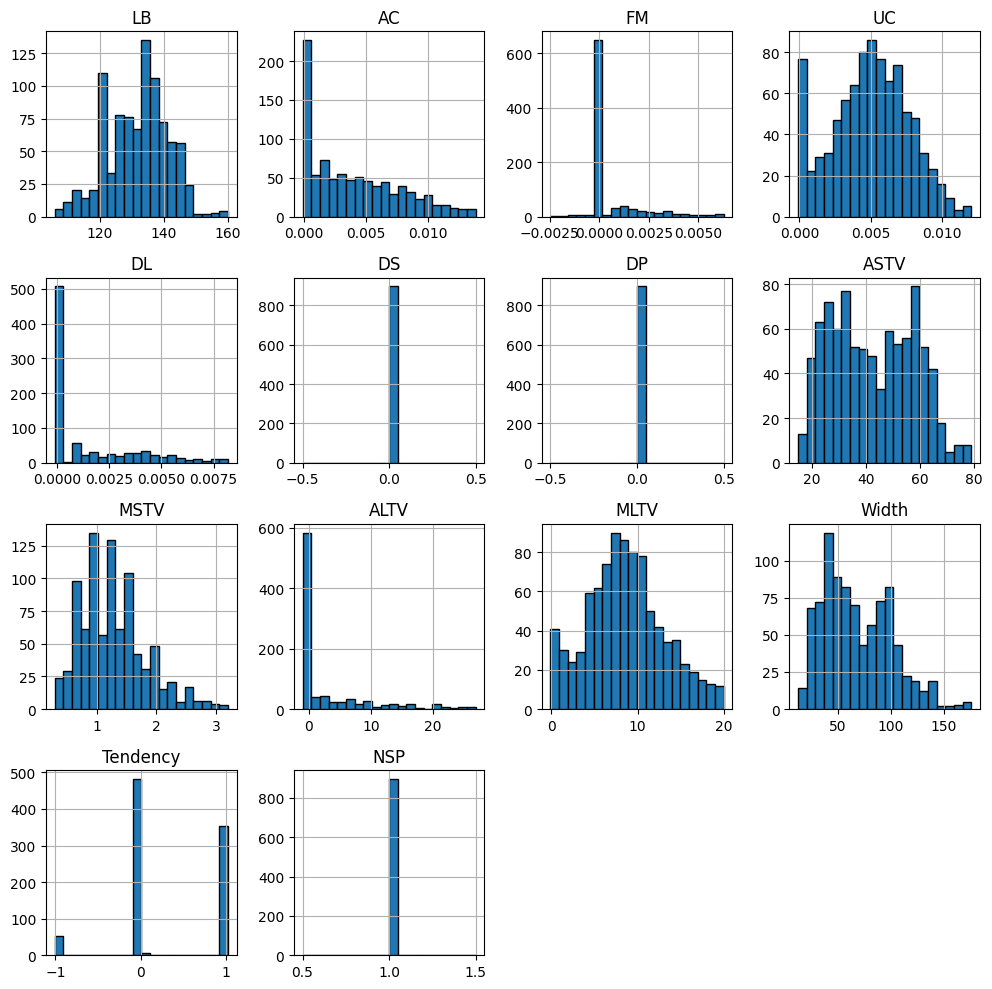

In [19]:
#visulization
df.hist(figsize=(10, 10), bins=20,edgecolor='black')
plt.tight_layout()
plt.show()



In [20]:
#quantify the realtionship between variables
correlation_matrix = df.corr()
print(correlation_matrix)

                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.078465  0.007362 -0.023568  0.020806 NaN NaN  0.262721   
AC        0.078465  1.000000  0.080153  0.057284 -0.101866 NaN NaN  0.024343   
FM        0.007362  0.080153  1.000000 -0.204990  0.058476 NaN NaN  0.362630   
UC       -0.023568  0.057284 -0.204990  1.000000  0.177702 NaN NaN -0.004523   
DL        0.020806 -0.101866  0.058476  0.177702  1.000000 NaN NaN  0.001806   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.262721  0.024343  0.362630 -0.004523  0.001806 NaN NaN  1.000000   
MSTV     -0.254885  0.152222  0.113420  0.110100  0.509405 NaN NaN -0.347374   
ALTV      0.123808 -0.323303 -0.087180 -0.076435 -0.107464 NaN NaN  0.150569   
MLTV     -0.118814 -0.397042 -0.110709 -0.104061 -0.214110 NaN NaN -0.330139   
Width     0.011746  0.281806  0.159918  

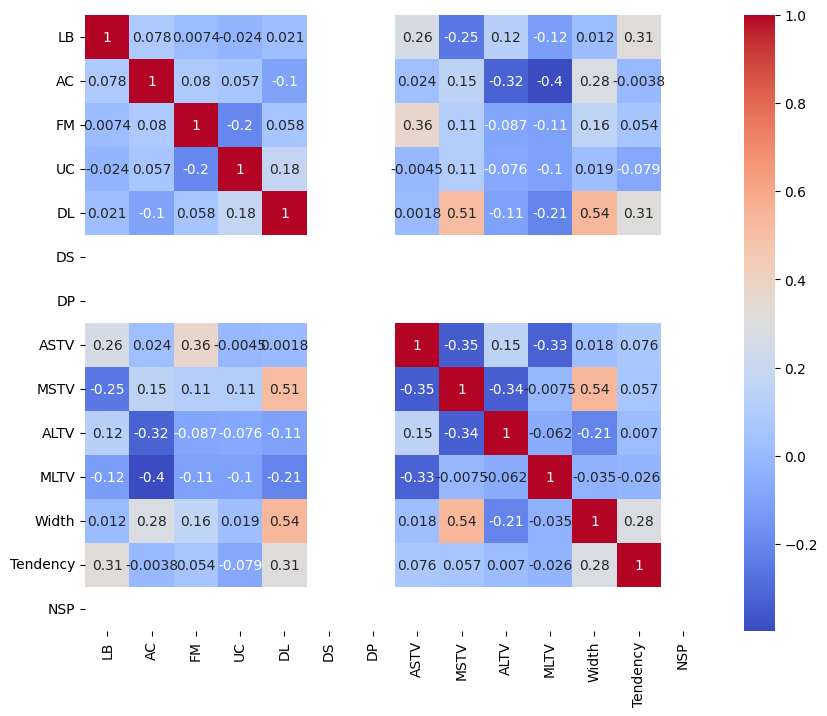

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

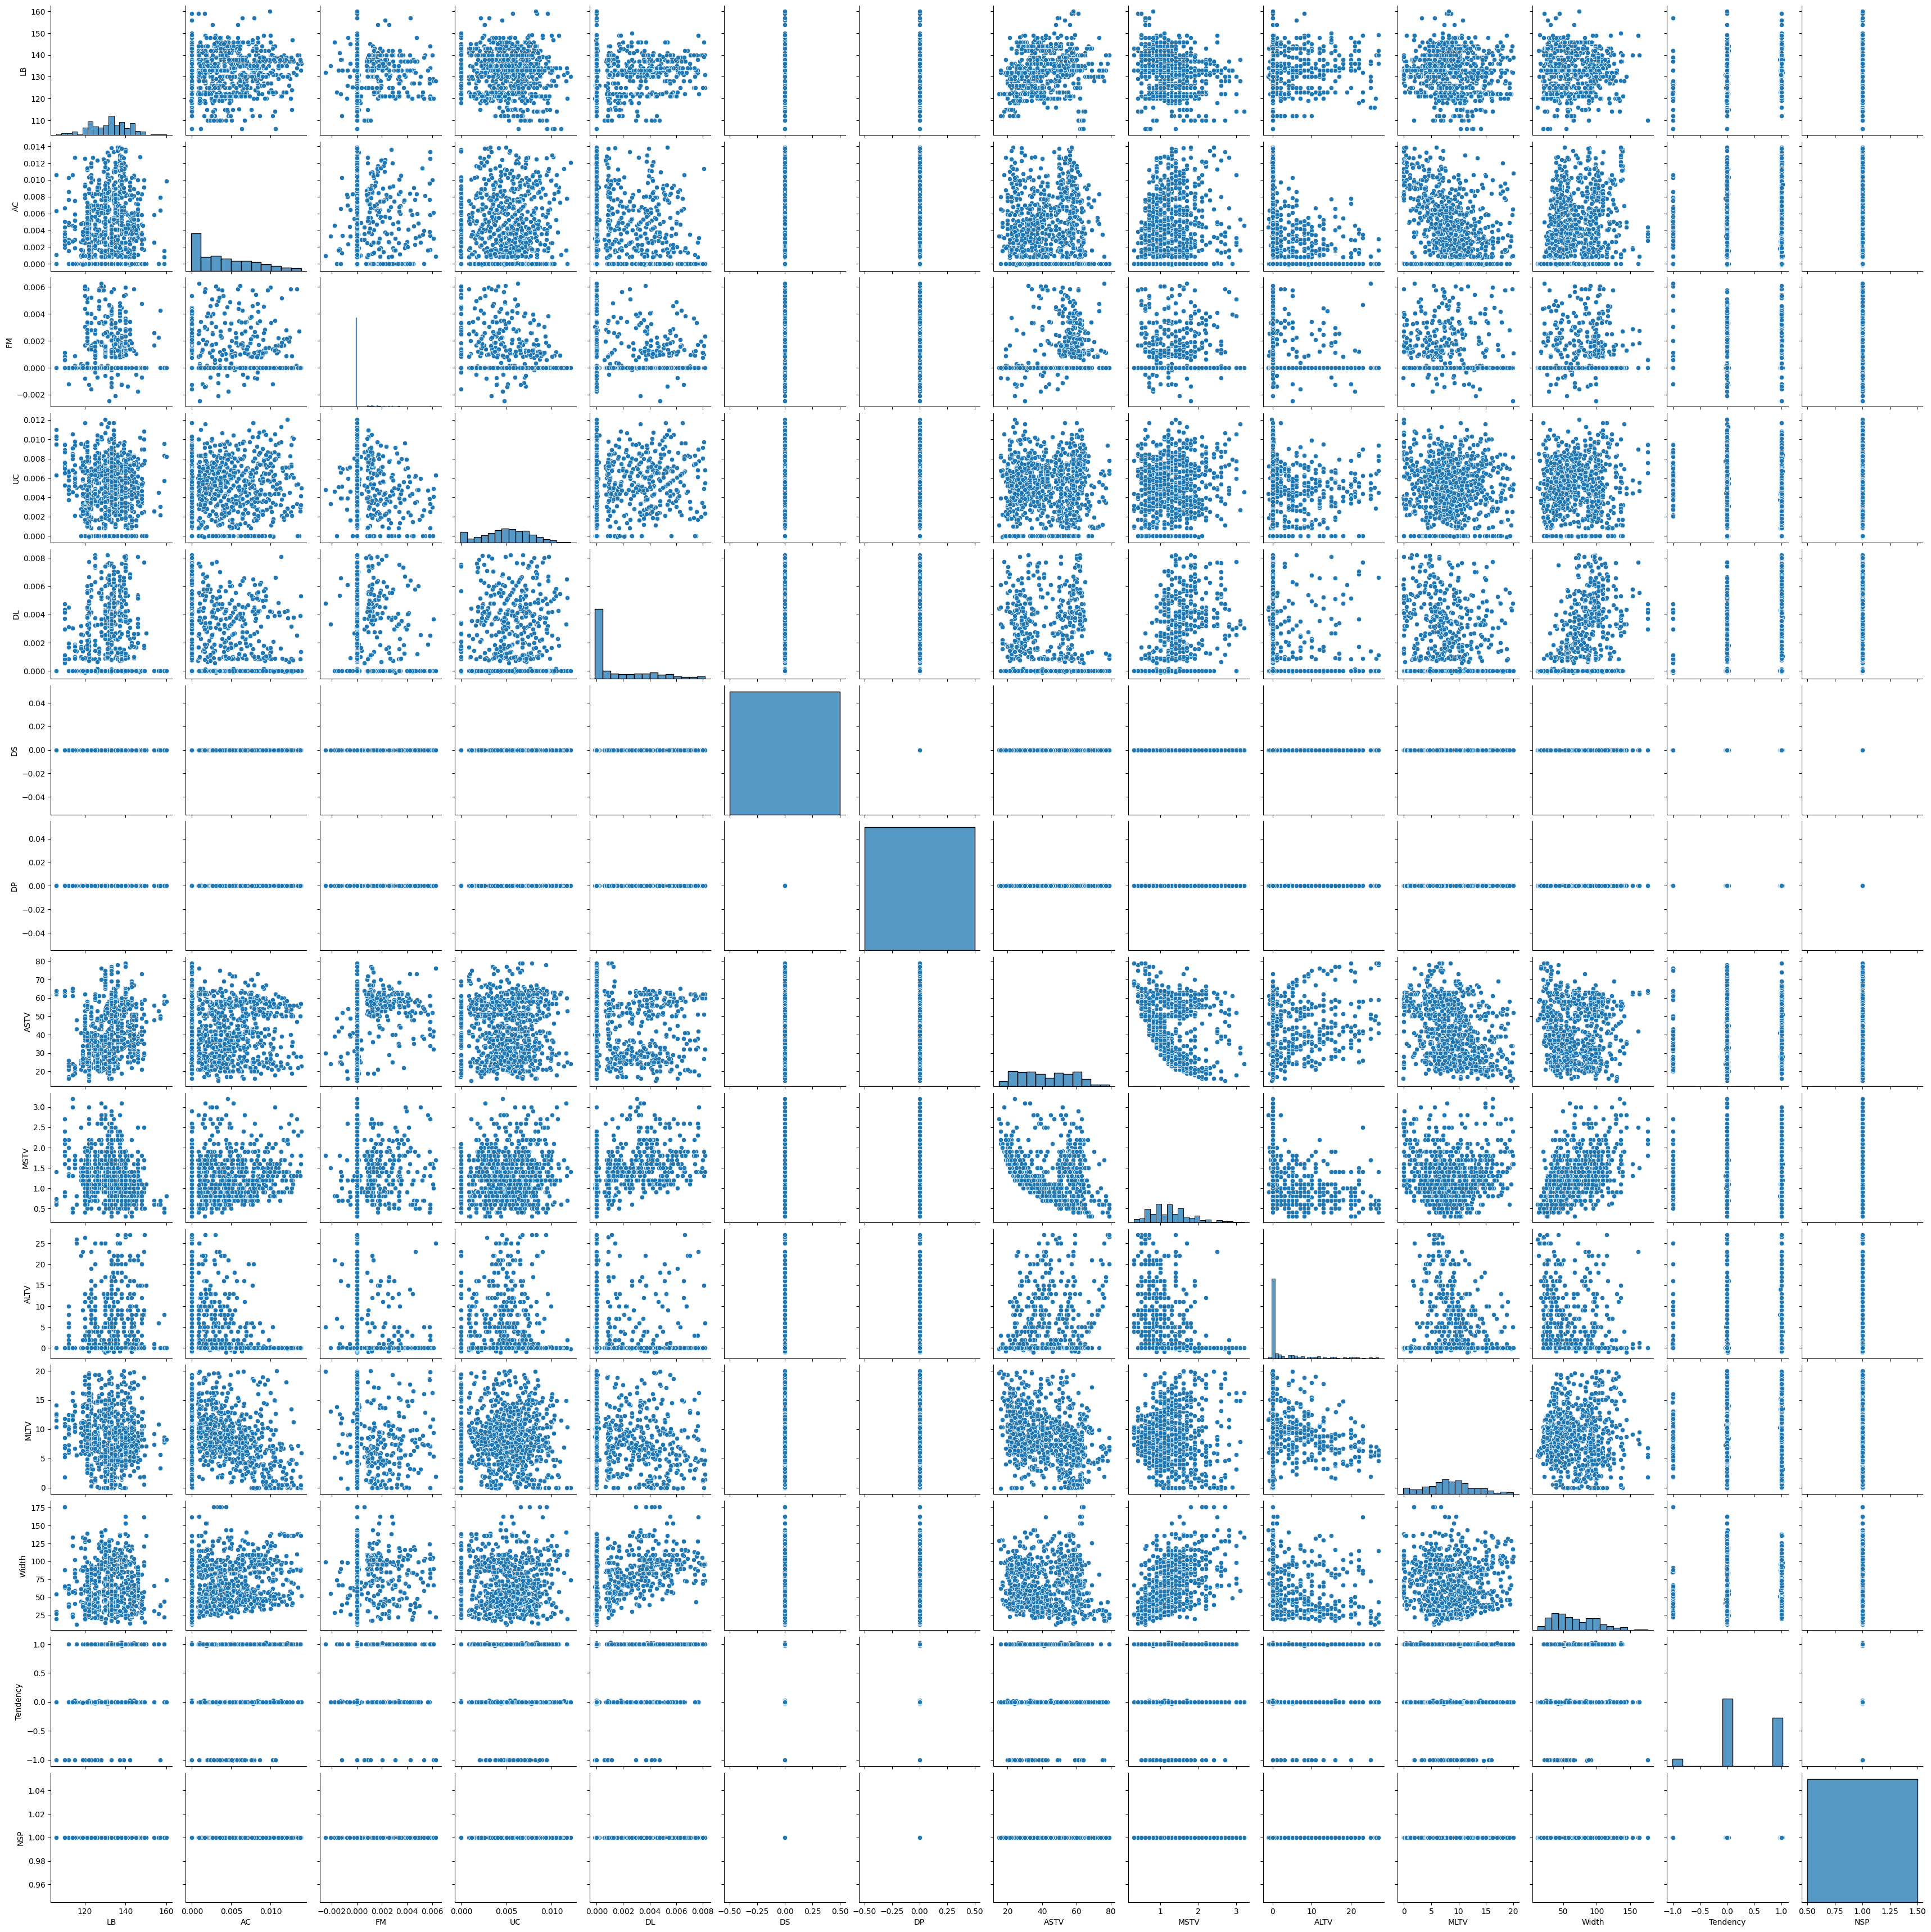

In [22]:
sns.pairplot(df)
plt.show()


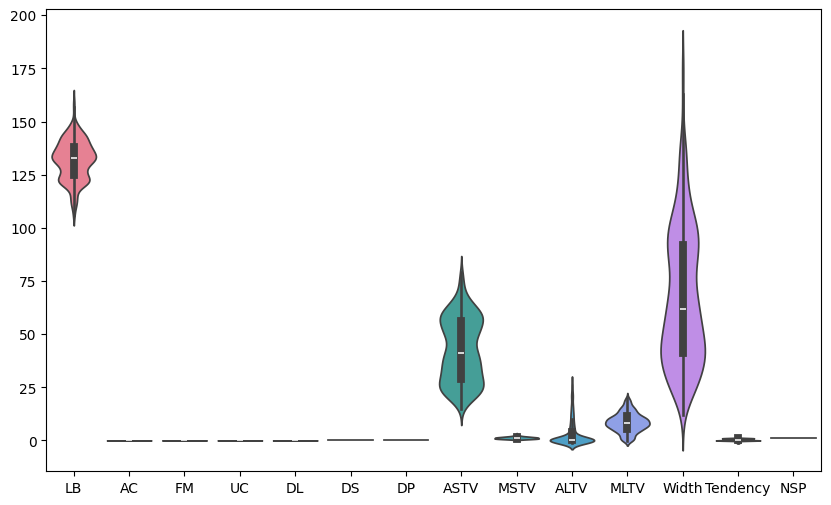

In [23]:
# Violin plot for a specific variable
plt.figure(figsize=(10, 6))
sns.violinplot(df)
plt.show()


In [24]:
# Strongest correlations
high_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("High correlations:\n", high_corr)



High correlations:
            LB   AC   FM   UC   DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0 NaN NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN NaN NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN   

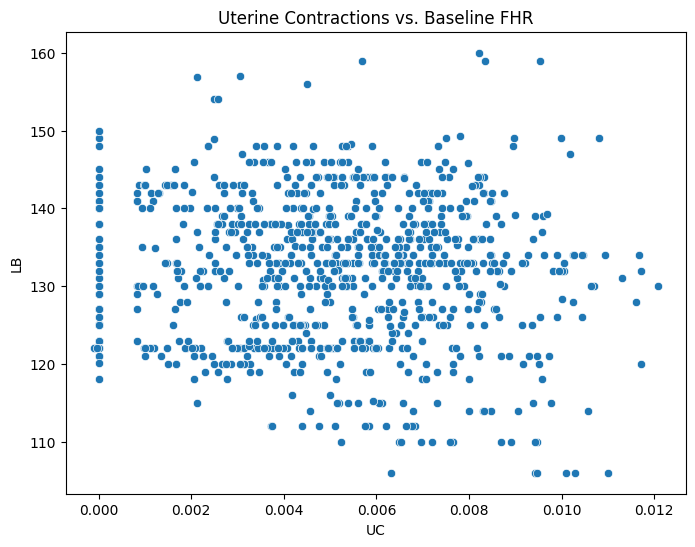

In [25]:
# Insights into trends or patterns
# Example: Checking the relationship between uterine contractions (UC) and baseline heart rate (LB)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UC', y='LB', data=df)
plt.title('Uterine Contractions vs. Baseline FHR')
plt.show()
